In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 729, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/usr/local/lib/python3.6/dist-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/usr/local/lib/python3.6/dist-packages/zmq/sugar/socket.py", line 475, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 791, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 827, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 186, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

TypeError: ignored

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'ISyE6416 Twitter Sentiment Analysis Project'


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ISyE6416 Twitter Sentiment Analysis Project/Tweets.csv")

Clean text messages

In [ ]:
#df = pd.read_csv('Tweets.csv')
df = df.drop(df.columns[[3,4,6,8,9,11,12,13,14]],axis=1)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def tweet_to_words(raw_tweet):
    words = raw_tweet.lower().split()                             
    stops = set(stopwords.words("english"))                
    meaningful_words = [w for w in words if not w in stops]
    letters_only = re.sub("[^a-zA-Z]", " "," ".join( meaningful_words )) 
    return(letters_only) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_copy = df.copy()

In [ ]:
df = df.drop_duplicates(subset=['name', 'text'], keep=False)
df.iloc[:,5]=df.iloc[:,5].apply(lambda x: tweet_to_words(x))
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,virginamerica dhepburn said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,virginamerica plus added commercials experien...
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,virginamerica today must mean need take an...
3,570301031407624196,negative,1.0000,Virgin America,jnardino,virginamerica really aggressive blast obnoxio...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,virginamerica really big bad thing


In [ ]:
nltk.download('punkt')
corpus = np.asarray(df.iloc[:,5])

#Frequence of the words
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse = True)}
wordfreq = {k: v for k, v in wordfreq.items() if v >= 2}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


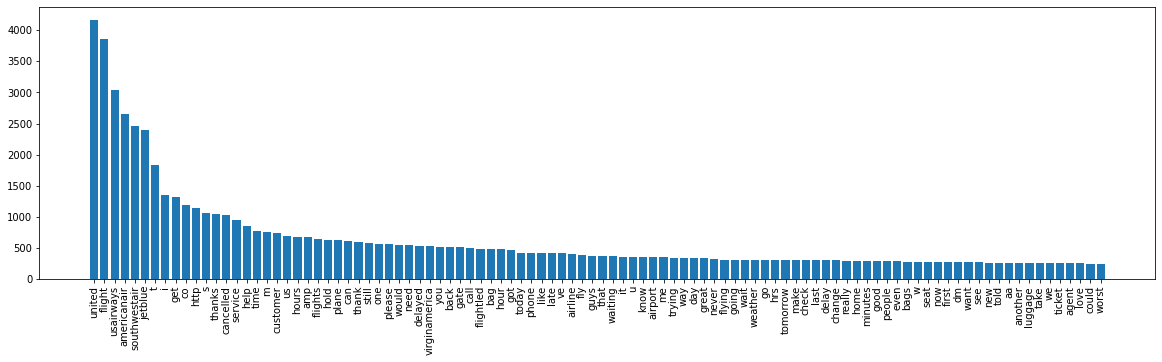

In [ ]:
most_freq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse = True)[:100]}
plt.figure(figsize=(20,5)) 
plt.bar(range(len(most_freq)), list(most_freq.values()), align='center')
plt.xticks(range(len(most_freq)), list(most_freq.keys()), rotation = 90)
plt.show()

## Data Exploration

Find duplicate users that post same complaint

In [ ]:
len(df['tweet_id']) == len(df['tweet_id'].unique())

True

In [ ]:
from nltk.corpus import stopwords
import string  
STOPWORDS = set(stopwords.words('english')) 
# word_count
df_copy['word_count'] = df_copy['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_copy['unique_word_count'] = df_copy['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_copy['stop_word_count'] = df_copy['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_copy['url_count'] = df_copy['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_copy['mean_word_length'] = df_copy['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_copy['char_count'] = df_copy['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_copy['punctuation_count'] = df_copy['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_copy['hashtag_count'] = df_copy['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_copy['mention_count'] = df_copy['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [ ]:
df_copy['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
df_copy.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,text,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,4,4,1,0,8.000000,35,3,0,2
1,570301130888122368,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,9,9,3,0,7.111111,72,6,0,1
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,12,11,4,0,5.000000,71,6,0,1
3,570301031407624196,negative,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,17,17,6,0,6.470588,126,7,0,1
4,570300817074462722,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,10,10,5,0,4.600000,55,2,0,1


In [ ]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

##porter=PorterStemmer()
porter=SnowballStemmer('english')
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

df_copy['clean_text'] = df_copy['text'].apply(stemSentence)

In [ ]:
df_copy.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,text,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,clean_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,4,4,1,0,8.000000,35,3,0,2,@ virginamerica what @ dhepburn said .
1,570301130888122368,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,9,9,3,0,7.111111,72,6,0,1,@ virginamerica plus you ve ad commerci to the...
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,12,11,4,0,5.000000,71,6,0,1,@ virginamerica i did n't today ... must mean ...
3,570301031407624196,negative,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,17,17,6,0,6.470588,126,7,0,1,@ virginamerica it 's realli aggress to blast ...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,10,10,5,0,4.600000,55,2,0,1,@ virginamerica and it 's a realli big bad thi...


In [ ]:
df_copy.iloc[:, 6:]

,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,clean_text
0,4,4,1,0,8.000000,35,3,0,2,@ virginamerica what @ dhepburn said .
1,9,9,3,0,7.111111,72,6,0,1,@ virginamerica plus you ve ad commerci to the...
2,12,11,4,0,5.000000,71,6,0,1,@ virginamerica i did n't today ... must mean ...
3,17,17,6,0,6.470588,126,7,0,1,@ virginamerica it 's realli aggress to blast ...
4,10,10,5,0,4.600000,55,2,0,1,@ virginamerica and it 's a realli big bad thi...
...,...,...,...,...,...,...,...,...,...,...
14635,11,11,5,0,4.818182,63,2,0,1,@ americanair thank you we got on a differ fli...
14636,23,20,6,0,5.565217,150,4,0,1,@ americanair leav over 20 minut late flight ....
14637,7,7,1,0,7.714286,60,2,1,1,@ americanair pleas bring american airlin to #...
14638,23,20,14,0,4.913043,135,7,0,1,"@ americanair you have my money , you chang my..."


In [ ]:
clean_text

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import FunctionTransformer


X = df_copy['clean_text']
Y = df_copy['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

pipeline = Pipeline([('vect', TfidfVectorizer()),
                     ('todense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                     ('pca',  SparsePCA(n_components=200, random_state=0)),
                     ('clf', LogisticRegression())])

model = pipeline.fit(X_train, y_train)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      3009
     neutral       0.66      0.46      0.54      1053
    positive       0.75      0.52      0.62       770

    accuracy                           0.76      4832
   macro avg       0.73      0.64      0.67      4832
weighted avg       0.75      0.76      0.75      4832

[[2808  146   55]
 [ 491  484   78]
 [ 268   98  404]]


In [ ]:
#K fold cross validation


## Data Visaulization

In [ ]:
labels = df_copy.iloc[:, [1]]
X1 = df_copy.iloc[:, 6:10]
X2 = df_copy.iloc[:, 10:14]
combined1 = pd.concat([labels, X1], axis=1)
combined2 = pd.concat([labels, X2], axis=1)

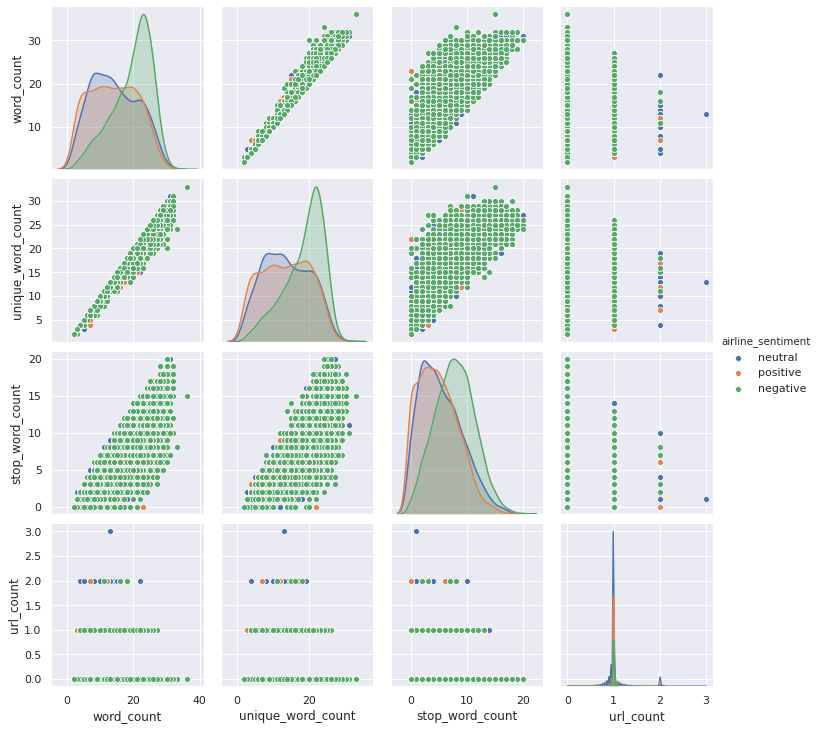

In [ ]:
sns.set(color_codes=True)
sns.pairplot(combined1, hue="airline_sentiment")

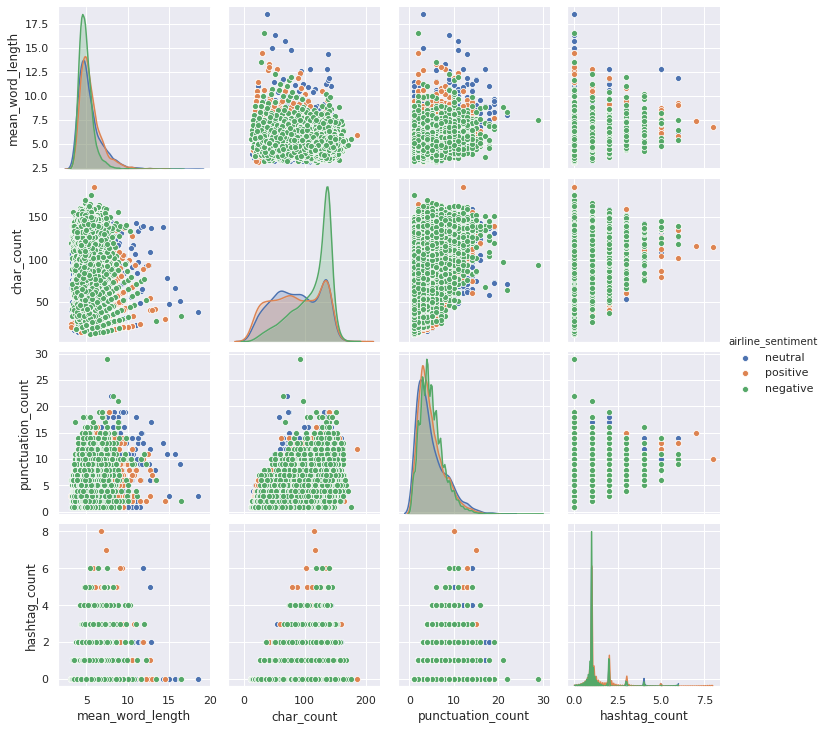

In [ ]:
sns.set(color_codes=True)
sns.pairplot(combined2, hue="airline_sentiment")

In [ ]:
def tweet_to_wordsnospecial(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                
    meaningful_words = [w for w in words if not w in stops or w != '@' or w != "#" or w != 'amp' or w != 'co'] 
    return(" ".join( meaningful_words )) 
text = ""
xxx = df_copy['clean_text'].apply(tweet_to_wordsnospecial)
for i in xxx:
  text += i
text

'virginamerica what dhepburn saidvirginamerica plus you ve ad commerci to the experi tackivirginamerica i did n t today must mean i need to take anoth tripvirginamerica it s realli aggress to blast obnoxi entertain in your guest face amp they have littl recoursvirginamerica and it s a realli big bad thing about itvirginamerica serious would pay a flight for seat that did n t have this play it s realli the onli bad thing about fli vavirginamerica yes near everi time i fli vx this ear worm won t go awayvirginamerica realli miss a prime opportun for men without hat parodi there https t co mwpg grezpvirginamerica well i didn t but now i do dvirginamerica it was amaz and arriv an hour earli you re too good to mevirginamerica did you know that suicid is the second lead caus of death among teenvirginamerica i lt pretti graphic so much better than minim iconographi dvirginamerica this is such a great deal alreadi think about my nd trip to australia amp i have n t even gone on my st trip yet pv

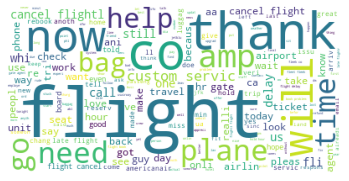

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

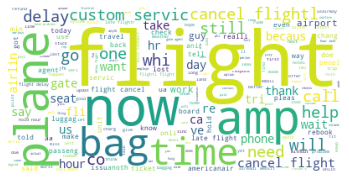

In [ ]:
#negative
nword = df_copy[df_copy['airline_sentiment'] == 'negative']
negatext = ""
x_ne = nword['clean_text'].apply(tweet_to_wordsnospecial)
for i in x_ne:
  negatext += i
wordcloud = WordCloud(background_color="white").generate(negatext)
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#posti
poword = df_copy[df_copy['airline_sentiment'] == 'postive']
posttext = ""
x_po = poword['clean_text'].apply(tweet_to_wordsnospecial)
for i in x_po:
  posttext += i

wordcloud = WordCloud(background_color="white").generate(posttext)
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

ValueError: ignored

Bag - of - words

In [ ]:
from collections import Counter
from nltk.stem.snowball import SnowballStemmer

#I'm not super familiar with dataframes so I'm making a copy to mess around with
df2 = df.copy()
df2['text'] = df['text'].apply(lambda x: tweet_to_words(x))
df2['text']

#run this after removing stop words and normalizing case, etc.
def transform_to_bag_of_words(dframe, remove_unique_features=True, stem=True):
    all_words = [x for text in dframe['text'] for x in text.split(" ")]
    if stem:
        stemmer = SnowballStemmer('english')
        all_words = [stemmer.stem(x) for x in all_words]
    if remove_unique_features:
        all_words_counter = Counter(all_words)
        all_words = [x for x in all_words if all_words_counter[x] > 1]
    all_words = list(set(all_words))
    data = []
    labels = []
    for text, label in zip(dframe['text'], dframe['airline_sentiment']):
        counts = Counter(text.split(" "))
        vector = [counts[word] if word in counts.keys() else 0 for word in all_words]
        data.append(vector)
        labels.append(label)
    return data, labels


#df2.columns
data2, labels2 = transform_to_bag_of_words(df2, remove_unique_features=True, stem = False)


THIS BAG OF WORDS WORKS BETTER; THE OTHER HAD SOME ISSUES

In [ ]:
sentence_vectors = []

for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in wordfreq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)
    
sentence_vectors = np.asarray(sentence_vectors)
sentence_vectors.shape

In [ ]:
np.asarray(data2).shape

(14640, 5920)

K-folds cross-validation

In [ ]:
from sklearn.model_selection import KFold
nsplits = 5
kf = KFold(n_splits=nsplits, shuffle=True)
split_list = [x for x in kf.split(data2, labels2)]

NAIVE BAYES (MN, Complement)

In [ ]:
X = df_copy['clean_text']
Y = df_copy['airline_sentiment']
Y[0]

'neutral'

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

def naive_bayes(train_data, train_label, test_data, test_label, type="multi"):
    clf = MultinomialNB() if type == "multi" else ComplementNB() if type == "complement" else None
    if clf == None:
        print("Unexpected type parameter for naive bayes: " + str(type) + ". Options are \"multi\" and \"complement\".")
        return
    step = 1000
    #data vectors too large to learn all at once
    for i in range(0, len(train_data), step):
        clf.partial_fit(train_data[i:i+step], train_label[i:i+step], ['positive', 'negative', 'neutral'])
    prediction = []
    for i in range(0, len(test_data), step):
        prediction = prediction + list(clf.predict(test_data[i:i+step]))
    error = sum([1 if prediction[i] != test_label[i] else 0 for i in range(len(prediction))]) / float(len(prediction))
    #print("Average 0-1 loss for " + type + " bayes: " + str(error))
    return error, confusion_matrix(test_label, prediction, labels=["positive", "negative", "neutral"], normalize='true')

In [ ]:
error = 0
confusion = np.diag([0,0,0])
for train_indices, test_indices in split_list:
    train_data = [data2[i] for i in train_indices]
    train_label = [labels2[i] for i in train_indices]
    test_data = [data2[i] for i in test_indices]
    test_label = [labels2[i] for i in test_indices]
    e,c = naive_bayes(train_data, train_label, test_data, test_label, 'complement')
    error += e
    confusion = np.add(confusion, c)
error /= float(nsplits)
confusion = np.divide(confusion, nsplits)
print("Average average error across " + str(nsplits) + " folds: " + str(error))
print("Average confusion matrix: " + str(confusion))

Average average error across 5 folds: 0.2364071038251366
Average confusion matrix: [[0.74790436 0.12373945 0.12835619]
 [0.05870972 0.84560243 0.09568785]
 [0.1648171  0.30267434 0.53250855]]


LASSO regression

In [ ]:
labels = df['airline_sentiment']

lbl = [1 if (x=='neutral') or (x=='positive') else x for x in labels]
lbl = [0 if (x=='negative') else x for x in lbl]

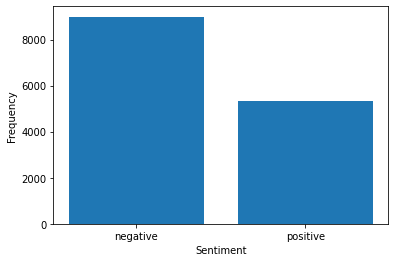

In [ ]:
counts = [lbl.count(0),lbl.count(1)]

bars = ('negative', 'positive')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, counts)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = sentence_vectors
y = lbl

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log.predict(X_test)
print('Accuracy of LASSO classifier on set: {:.2f}'.format(log.score(X_test, y_test)))

Accuracy of LASSO classifier on set: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred, normalize='true')

array([[0.8518931 , 0.1481069 ],
       [0.23012161, 0.76987839]])

Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm
from sklearn.model_selection import cross_val_score

#Create a svm Classifier
clf = svm.SVC() # RBF Kernel

#Train the model using the training sets
#clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NameError: ignored

In [ ]:
confusion_matrix(y_test,y_pred, normalize='true')

array([[0.93315068, 0.04876712, 0.01808219],
       [0.47272727, 0.4661157 , 0.06115702],
       [0.27710843, 0.13453815, 0.58835341]])